# Numpy -  multidimensional data arrays

Parts of this notebook have been taken from:

[http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.io](http://jrjohansson.github.io).

## Introduction

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 



To use `numpy` you need to import the module, using for example:

In [1]:
from numpy import *

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. 



## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

## From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [2]:
# a vector: the argument to the array function is a Python list
v = array([1,2,3,4])
v

array([1, 2, 3, 4])

In [3]:
# a matrix: the argument to the array function is a nested Python list
M = array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [4]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [5]:
v.shape

(4,)

In [6]:
M.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [7]:
M.size

4

Equivalently, we could use the function `numpy.shape` and `numpy.size`

In [8]:
shape(M)

(2, 2)

In [9]:
size(M)

4

So far the `numpy.ndarray` looks awfully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any **kind of object**. They are **dynamically typed**. 


* They do not support mathematical functions such as matrix and dot multiplications, etc. 


* Implementing such functions for Python lists would not be very efficient because of the dynamic typing.

* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.


* Numpy arrays are memory efficient.


* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [10]:
M.dtype

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [11]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [12]:
M = array([[1, 2], [3, 4]], dtype=complex)
M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Common data types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

## Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:

### `arange`

In [13]:
x = arange(start=0, stop=10, step=1) # arguments: start, stop, step
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
x = arange(-1, 1, 0.1)
x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

### `linspace` and `logspace`

In [15]:
# using linspace, both end points ARE included by default.
# num is the number of samples to generate.
linspace(start=0, stop=10, num=25)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

In [16]:
# logspace is similar to linspace but it starts with (base ** start) and finishes with (base ** end)
logspace(0, 10, 10, base=e)

array([1.00000000e+00, 3.03773178e+00, 9.22781435e+00, 2.80316249e+01,
       8.51525577e+01, 2.58670631e+02, 7.85771994e+02, 2.38696456e+03,
       7.25095809e+03, 2.20264658e+04])

### Random data

In [17]:
from numpy import random

In [18]:
# uniform random numbers in [0,1]
random.rand(5,5)

array([[0.27416495, 0.37461395, 0.99389825, 0.34906947, 0.14253052],
       [0.99230561, 0.06283221, 0.62254697, 0.73739882, 0.56613496],
       [0.89634898, 0.29304461, 0.12389244, 0.33888226, 0.60108246],
       [0.16200092, 0.67667864, 0.17822635, 0.29656579, 0.77486209],
       [0.09754344, 0.29376581, 0.89560951, 0.5863796 , 0.82016457]])

In [19]:
# standard normal distributed random numbers
random.randn(5,5)

array([[-0.12998592,  2.07319635, -0.6896006 , -0.69830974, -0.8418991 ],
       [-0.75353272,  0.13386894, -0.5838475 , -0.87444195, -0.22417816],
       [ 2.12840758,  0.41771072,  0.03135824, -0.89192443,  1.03670214],
       [-0.0131818 ,  0.74654267,  1.55176583,  0.94719647,  0.08157623],
       [ 0.93888501,  0.30532397,  0.60372866,  0.1513844 , -1.43690898]])

### `diag`

In [20]:
# a diagonal matrix
diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [21]:
# diagonal with offset from the main diagonal
diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

### `zeros` and `ones`

In [22]:
zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [23]:
ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## File I/O

### Comma-separated values (CSV)

A very common file format for data files is comma-separated values (CSV), or related formats such as TSV (tab-separated values). To read data from such files into Numpy arrays we can use the `numpy.genfromtxt` function. For example, 

In [24]:
!head "./data/stockholm_td_adj.dat"

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [25]:
data = genfromtxt('./data/stockholm_td_adj.dat')
data

array([[ 1.800e+03,  1.000e+00,  1.000e+00, ..., -6.100e+00, -6.100e+00,
         1.000e+00],
       [ 1.800e+03,  1.000e+00,  2.000e+00, ..., -1.540e+01, -1.540e+01,
         1.000e+00],
       [ 1.800e+03,  1.000e+00,  3.000e+00, ..., -1.500e+01, -1.500e+01,
         1.000e+00],
       ...,
       [ 2.011e+03,  1.200e+01,  2.900e+01, ...,  4.200e+00,  4.200e+00,
         1.000e+00],
       [ 2.011e+03,  1.200e+01,  3.000e+01, ..., -1.000e-01, -1.000e-01,
         1.000e+00],
       [ 2.011e+03,  1.200e+01,  3.100e+01, ..., -3.300e+00, -3.300e+00,
         1.000e+00]])

In [26]:
data.shape

(77431, 7)

In [27]:
# what is this line all about?!? Answer in lecture 4
%matplotlib inline
import matplotlib.pyplot as plt

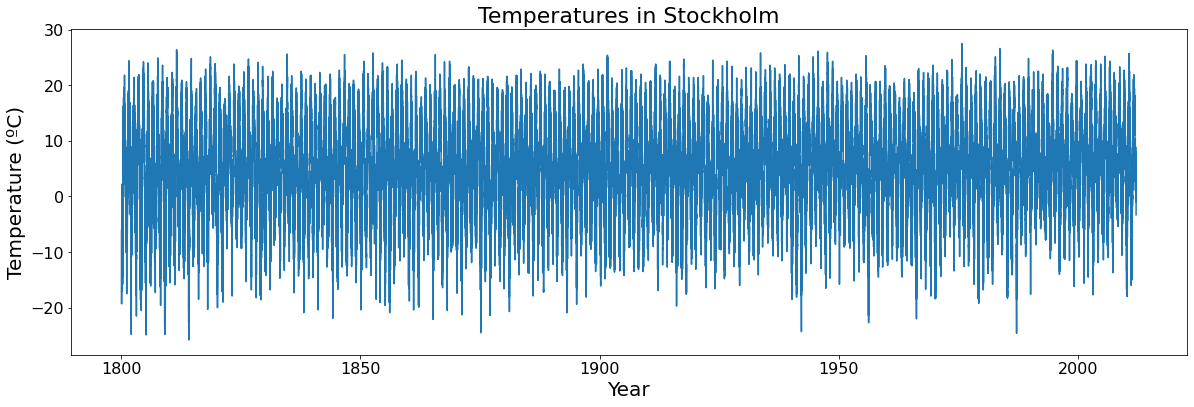

In [28]:
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('Temperatures in Stockholm', fontsize=22)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Temperature (ºC)', fontsize=20);
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

Using `numpy.savetxt` we can store a Numpy array to a file in CSV format:

In [29]:
M = random.rand(3,3)
M

array([[0.95250398, 0.57636131, 0.32609298],
       [0.67406949, 0.65314033, 0.16487867],
       [0.46612043, 0.30815538, 0.11233677]])

In [30]:
savetxt("random-matrix.csv", M)

In [31]:
!cat random-matrix.csv

9.525039806505027906e-01 5.763613094721058427e-01 3.260929833519216059e-01
6.740694924593617632e-01 6.531403314546201377e-01 1.648786743139626365e-01
4.661204345223936008e-01 3.081553815900727189e-01 1.123367670423757181e-01


In [32]:
savetxt("random-matrix.csv", M, fmt='%.5f') # fmt specifies the format
!cat random-matrix.csv

0.95250 0.57636 0.32609
0.67407 0.65314 0.16488
0.46612 0.30816 0.11234


### Numpy's native file format

Useful when storing and reading back numpy array data. Use the functions `numpy.save` and `numpy.load`:

In [33]:
save("random-matrix.npy", M)

!file random-matrix.npy

random-matrix.npy: NumPy array, version 1.0, header length 118


In [34]:
load("random-matrix.npy")

array([[0.95250398, 0.57636131, 0.32609298],
       [0.67406949, 0.65314033, 0.16487867],
       [0.46612043, 0.30815538, 0.11233677]])

## More properties of the numpy arrays

In [35]:
M.itemsize # bytes per element

8

In [36]:
M.nbytes # number of bytes

72

In [37]:
M.ndim # number of dimensions

2

## Manipulating arrays

## Indexing

We can index elements in an array using square brackets and indices:

In [38]:
# v is a vector, and has only one dimension, taking one index
v[0]

1

In [39]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[1,1]

0.6531403314546201

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [40]:
M

array([[0.95250398, 0.57636131, 0.32609298],
       [0.67406949, 0.65314033, 0.16487867],
       [0.46612043, 0.30815538, 0.11233677]])

In [41]:
M[1]

array([0.67406949, 0.65314033, 0.16487867])

The same thing can be achieved with using `:` instead of an index: 

In [42]:
M[1,:] # row 1

array([0.67406949, 0.65314033, 0.16487867])

In [43]:
M[:,1] # column 1

array([0.57636131, 0.65314033, 0.30815538])

We can assign new values to elements in an array using indexing:

In [44]:
M[0,0] = 1

In [45]:
M

array([[1.        , 0.57636131, 0.32609298],
       [0.67406949, 0.65314033, 0.16487867],
       [0.46612043, 0.30815538, 0.11233677]])

In [46]:
# also works for rows and columns
M[1,:] = 0
M[:,2] = -1

In [47]:
M

array([[ 1.        ,  0.57636131, -1.        ],
       [ 0.        ,  0.        , -1.        ],
       [ 0.46612043,  0.30815538, -1.        ]])

### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [48]:
A = array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [49]:
A[1:3]

array([2, 3])

Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [50]:
A[1:3] = [-2,-3]
A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[lower:upper:step]`:

In [51]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [52]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [53]:
A[:3] # first three elements

array([ 1, -2, -3])

In [54]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array (positive index from the begining):

In [55]:
A = array([1,2,3,4,5])

In [56]:
A[-1] # the last element in the array

5

In [57]:
A[-3:] # the last three elements

array([3, 4, 5])

Index slicing works exactly the same way for multidimensional arrays:

In [58]:
A = array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [59]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [60]:
# strides
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Fancy indexing

Fancy indexing is the name for when an array or list is used in-place of an index: 

In [61]:
row_indices = [1, 2, 3]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [62]:
col_indices = [1, 2, -1] # remember, index -1 means the last element
A[row_indices, col_indices]

array([11, 22, 34])

We can also use index masks: If the index mask is an Numpy array of data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position of each element: 

In [63]:
B = array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [64]:
row_mask = array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [65]:
# same thing
row_mask = array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [66]:
x = arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [67]:
mask = (5 < x) * (x < 7.5)

mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [68]:
x[mask]

array([5.5, 6. , 6.5, 7. ])

## Functions for extracting data from arrays and creating arrays

### `where`

The index mask can be converted to position index using the `where` function

In [69]:
indices = where(mask)
indices

(array([11, 12, 13, 14]),)

In [70]:
x[indices] # this indexing is equivalent to the fancy indexing x[mask]

array([5.5, 6. , 6.5, 7. ])

### `diag`

With the diag function we can also extract the diagonal and subdiagonals of an array:

In [71]:
diag(A)

array([ 0, 11, 22, 33, 44])

In [72]:
diag(A, -1)

array([10, 21, 32, 43])

### `choose`

Constructs an array by picking elements from several arrays:

In [73]:
which = [1, 0, 1, 0]
choices = [[-2,-2,-2,-2], [5,5,5,5]]

choose(which, choices)

array([ 5, -2,  5, -2])

## Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [74]:
v1 = arange(0, 5)

In [75]:
v1 * 2

array([0, 2, 4, 6, 8])

In [76]:
v1 + 2

array([2, 3, 4, 5, 6])

In [77]:
A * 2, A + 2

(array([[ 0,  2,  4,  6,  8],
        [20, 22, 24, 26, 28],
        [40, 42, 44, 46, 48],
        [60, 62, 64, 66, 68],
        [80, 82, 84, 86, 88]]),
 array([[ 2,  3,  4,  5,  6],
        [12, 13, 14, 15, 16],
        [22, 23, 24, 25, 26],
        [32, 33, 34, 35, 36],
        [42, 43, 44, 45, 46]]))

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [78]:
A * A # element-wise multiplication

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [79]:
v1 * v1

array([ 0,  1,  4,  9, 16])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [80]:
A.shape, v1.shape

((5, 5), (5,))

In [81]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [82]:
dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [83]:
dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [84]:
dot(v1, v1)

30

Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra.

In [85]:
M = matrix(A)
v = matrix(v1).T # make it a column vector

In [86]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [87]:
M * M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [88]:
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [89]:
# inner product
v.T * v

matrix([[30]])

In [90]:
# with matrix objects, standard matrix algebra applies
v + M*v

matrix([[ 30],
        [131],
        [232],
        [333],
        [434]])

If we try to add, subtract or multiply objects with incomplatible shapes we get an error:

In [91]:
v = matrix([1,2,3,4,5,6]).T

In [92]:
shape(M), shape(v)

((5, 5), (6, 1))

In [93]:
M * v

ValueError: shapes (5,5) and (6,1) not aligned: 5 (dim 1) != 6 (dim 0)

See also the related functions: `inner`, `outer`, `cross`, `kron`, `tensordot`. Try for example `help(kron)`.

### Data processing

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays. 

For example, let's calculate some properties from the Stockholm temperature dataset used above.

In [94]:
# reminder, the temperature dataset is stored in the data variable:
shape(data)

(77431, 7)

### `mean`

In [95]:
# the temperature data is in column 3
mean(data[:,3])

6.197109684751585

The daily mean temperature in Stockholm over the last 200 years has been about 6.2 C.

### standard deviations and variance

In [96]:
std(data[:,3]), var(data[:,3])

(8.282271621340573, 68.59602320966341)

### `min` and `max`

In [97]:
# lowest daily average temperature
data[:,3].min()

-25.8

In [98]:
# highest daily average temperature
data[:,3].max()

28.3

### sum, prod, and trace

In [99]:
d = arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [100]:
# sum up all elements
sum(d)

45

In [101]:
# product of all elements
prod(d+1)

3628800

In [102]:
# cummulative sum
cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [103]:
# cummulative product
cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [104]:
# same as: diag(A).sum()
trace(A)

110

## Reshaping, resizing and stacking arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [105]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [106]:
n, m = A.shape
n,m

(5, 5)

In [107]:
B = A.reshape((1,n*m))
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

In [108]:
B[0,0:5] = 5 # modify the array
B

array([[ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

In [109]:
A # and the original variable is also changed. B is only a different view of the same data

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function create a copy of the data.

In [110]:
B = A.flatten()
B

array([ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [111]:
B[0:5] = 10
B

array([10, 10, 10, 10, 10, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [112]:
A # now A has not changed, because B's data is a copy of A's, not refering to the same data

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

## Copy and "deep copy"

To achieve high performance, assignments in Python usually do not copy the underlaying objects. This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (More technically, it follows a "Call by sharing" evaluation strategy). 

In [113]:
A = array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [114]:
# now B is referring to the same array data as A 
B = A 

In [115]:
# changing B affects A
B[0,0] = 10
B

array([[10,  2],
       [ 3,  4]])

In [116]:
A

array([[10,  2],
       [ 3,  4]])

If we want to avoid this behavior, so that when we get a new completely independent object `B` copied from `A`, then we need to do a so-called "deep copy" using the function `copy`:

In [117]:
B = copy(A)

In [118]:
# now, if we modify B, A is not affected
B[0,0] = -5
B

array([[-5,  2],
       [ 3,  4]])

In [119]:
A

array([[10,  2],
       [ 3,  4]])

## Iterating over array elements

Generally, we want to avoid iterating over the elements of arrays whenever we can (at all costs). The reason is that in a interpreted language like Python (or MATLAB), iterations are really slow compared to vectorized operations. 

However, sometimes iterations are unavoidable. For such cases, the Python `for` loop is the most convenient way to iterate over an array:

In [120]:
v = array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [121]:
M = array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


When we need to iterate over each element of an array and modify its elements, it is convenient to use the `enumerate` function to obtain both the element and its index in the `for` loop: 

In [122]:
M

array([[1, 2],
       [3, 4]])

In [123]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2
M

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


array([[ 1,  4],
       [ 9, 16]])

In [124]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

## Vectorizing functions

As mentioned several times by now, to get good performance we should try to avoid looping over elements in our vectors and matrices, and instead use vectorized algorithms. The first step in converting a scalar algorithm to a vectorized algorithm is to make sure that the functions we write work with vector inputs.

In [125]:
def Theta(x):
    """
    Scalar implemenation of the Heaviside step function.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [126]:
Theta(array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

OK, that didn't work because we didn't write the `Theta` function so that it can handle a vector input... 

To get a vectorized version of Theta we can use the Numpy function `vectorize`. In many cases it can automatically vectorize a function:

In [127]:
Theta_vec = vectorize(Theta)

In [128]:
Theta_vec(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

We can also implement the function to accept a vector input from the beginning (requires more effort but might give better performance):

In [129]:
def Theta(x):
    """
    Vector-aware implemenation of the Heaviside step function.
    """
    return 1 * (x >= 0)

In [130]:
Theta(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [131]:
# still works for scalars as well
Theta(-1.2), Theta(2.6)

(0, 1)

## Using arrays in conditions

When using arrays in conditions,for example `if` statements and other boolean expressions, one needs to use `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [132]:
M

array([[ 1,  4],
       [ 9, 16]])

In [133]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

at least one element in M is larger than 5


In [134]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## Type casting

Since Numpy arrays are *statically typed*, the type of an array does not change once created. But we can explicitly cast an array of some type to another using the `astype` functions (see also the similar `asarray` function). This always create a new array of new type:

In [135]:
M.dtype

dtype('int64')

In [136]:
M2 = M.astype(float)
M2

array([[ 1.,  4.],
       [ 9., 16.]])

In [137]:
M2.dtype

dtype('float64')

In [138]:
M3 = M.astype(bool)
M3

array([[ True,  True],
       [ True,  True]])

# Let's talk about speed

Pure Python is *slow*

Say that we want to do something on a matrix, for example keeping only values higher than a threshold

In [139]:
threshold = 0.7

big_matrix = random.random((10000,10000))
big_matrix

array([[0.51146067, 0.72857267, 0.154443  , ..., 0.01317198, 0.82510176,
        0.19098006],
       [0.82462748, 0.22054662, 0.48847803, ..., 0.68184605, 0.31100593,
        0.33268893],
       [0.87327189, 0.75794155, 0.60898502, ..., 0.94561396, 0.84138455,
        0.32213962],
       ...,
       [0.51949342, 0.45333584, 0.02036755, ..., 0.30696063, 0.8100174 ,
        0.79225496],
       [0.0253755 , 0.35498563, 0.08416521, ..., 0.98022519, 0.77048796,
        0.75512664],
       [0.80125664, 0.06273953, 0.92758866, ..., 0.42975459, 0.90483433,
        0.12221472]])

### Solution 1 - Loops

In [140]:
solution1_big_matrix = big_matrix.copy()

In [141]:
%%timeit
for row_index in range(solution1_big_matrix.shape[0]):
    for colum_index in range(solution1_big_matrix.shape[1]):
        
        if solution1_big_matrix[row_index, colum_index]<threshold:
            solution1_big_matrix[row_index, colum_index] = 0.0

36.4 s ± 1.95 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [142]:
solution1_big_matrix

array([[0.        , 0.72857267, 0.        , ..., 0.        , 0.82510176,
        0.        ],
       [0.82462748, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.87327189, 0.75794155, 0.        , ..., 0.94561396, 0.84138455,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.8100174 ,
        0.79225496],
       [0.        , 0.        , 0.        , ..., 0.98022519, 0.77048796,
        0.75512664],
       [0.80125664, 0.        , 0.92758866, ..., 0.        , 0.90483433,
        0.        ]])

### Solution 2 - Vectorization with boolean indexing

In [143]:
solution2_big_matrix = big_matrix.copy()

In [144]:
%%timeit
solution2_big_matrix[solution2_big_matrix<threshold]= 0.0

565 ms ± 10 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [145]:
solution2_big_matrix

array([[0.        , 0.72857267, 0.        , ..., 0.        , 0.82510176,
        0.        ],
       [0.82462748, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.87327189, 0.75794155, 0.        , ..., 0.94561396, 0.84138455,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.8100174 ,
        0.79225496],
       [0.        , 0.        , 0.        , ..., 0.98022519, 0.77048796,
        0.75512664],
       [0.80125664, 0.        , 0.92758866, ..., 0.        , 0.90483433,
        0.        ]])

### In this case vectorization is aroung 50x faster than loops, it will easily be much faster in a more realistic and complex computation


Take home message: NEVER use loops for computational tasks that can be easily vectorized

## Further reading

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.

In [146]:
class Balloon():
    def __init__(self, color: str):
        self.color = color

def foo(an_example: Balloon):
    an_example.color == "Red"
    an_example = Balloon("Green")
    an_example.color == "Blue"
        
def swap(a1: object, a2: object):
    temp = a1
    a1 = a2
    a2 = temp
    
    
red = Balloon("red")
blue = Balloon("blue")

swap(red, blue)
print("Red Color={}".format(red.color))
print("Blue Color={}".format(blue.color))

foo(blue)
print("After foo blue color:{}".format(blue.color))

Red Color=red
Blue Color=blue
After foo blue color:blue


In [147]:
def Theta(x):
    """
    Scalar implemenation of the Heaviside step function.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [148]:
Theta_vec = vectorize(Theta)

In [149]:
%%timeit 
Theta_vec(array([-3,-2,-1,0,1,2,3]))

16.8 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [150]:
b = array([0, 0, 0, 0, 0, 0, 0])

In [151]:
%%timeit
for index, item in enumerate(array([-3,-2,-1,0,1,2,3])):
    b[index] = Theta(item)

6.31 µs ± 816 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [152]:
def Theta(x):
    """
    Vector-aware implemenation of the Heaviside step function.
    """
    return 1 * (x >= 0)

In [153]:
%%timeit
Theta(array([-3,-2,-1,0,1,2,3]))

3.93 µs ± 312 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
